In [19]:
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import soepy

from smm_soepy_config import INIT_FILES_DIR

Analysis: 1st Estimation with SOEP Data
=================================

In [23]:
model_params = pd.read_pickle(INIT_FILES_DIR / "model_params_estimated_2.pkl")

In [24]:
model_params = model_params.drop(model_params.columns[1:], axis=1)
model_params

value
category      name               
const_wage_eq gamma_0s1  1.017899
              gamma_0s2  1.968050
              gamma_0s3  1.777328
exp_returns   gamma_1s1  0.116457
              gamma_1s2  0.164658
              gamma_1s3  0.263900
exp_accm      g_s1       0.122362
              g_s2       0.081612
              g_s3       0.113043
exp_deprec    delta_s1   0.064655
              delta_s2   0.048457
              delta_s3   0.064539
disutil_work  const_p    2.112434
              const_f    2.674605
hetrg_unobs   theta_p1  -0.076047
              theta_f1  -0.287018
shares        share_1    0.351852
sd_wage_shock sigma_1    0.016539
              sigma_2    0.182799
              sigma_3    0.593172

In [25]:
data_sim = soepy.simulate(model_params, str(INIT_FILES_DIR) + "/model_spec_init.yml", is_expected=False)

In [26]:
def get_moments(data):
    # Pre_process data frame

    # Determine the education level given years of experience
    data["Educ_Level"] = 0
    data.loc[(data["Years_of_Education"] >= 10) & (data["Years_of_Education"] < 12), "Educ_Level"] = 0
    data.loc[(data["Years_of_Education"] >= 12) & (data["Years_of_Education"] < 16), "Educ_Level"] = 1
    data.loc[data["Years_of_Education"] >= 16, "Educ_Level"] = 2

    # Determine the observed wage given period choice
    data["Wage_Observed"] = 0
    data.loc[data["Choice"] == 0, "Wage_Observed"] = data.loc[
        data["Choice"] == 0, "Period_Wage_N"
    ]
    data.loc[data["Choice"] == 1, "Wage_Observed"] = data.loc[
        data["Choice"] == 1, "Period_Wage_P"
    ]
    data.loc[data["Choice"] == 2, "Wage_Observed"] = data.loc[
        data["Choice"] == 2, "Period_Wage_F"
    ]

    # Calculate moments

    # Initialize moments dictionary
    moments = dict()

    # Store moments in groups as nested dictionary
    for group in ["Wage_Distribution", "Choice_Probability"]:
        moments[group] = dict()

    # Compute unconditional moments of the wage distribution
    info = data.groupby(["Period"])["Wage_Observed"].describe().to_dict()

    # Save mean and standard deviation of wages for each period
    # to Wage Distribution section of the moments dictionary
    for period in range(30):  ## TO DO: Remove hard coded number
        moments["Wage_Distribution"][period] = []
        try:
            for label in ["mean", "std"]:
                moments["Wage_Distribution"][period].append(info[label][period])
        except KeyError:
            for i in range(2):
                moments["Wage_Distribution"][period].append(0.0)

    # Compute unconditional moments of the choice probabilities
    info = data.groupby(["Period"])["Choice"].value_counts(normalize=True).to_dict()

    for period in range(30):  ## TO DO: Remove hard coded number
        moments["Choice_Probability"][period] = []
        for choice in range(3):
            try:
                stat = info[(period, choice)]
            except KeyError:
                stat = 0.00
            moments["Choice_Probability"][period].append(stat)

    return moments

In [27]:
moments_sim = get_moments(data_sim)

In [28]:
with open( str(INIT_FILES_DIR) + "/moments_obs.pkl", "rb") as f:
    moments_obs = pickle.load(f)

Choice Probabilities
------------------------

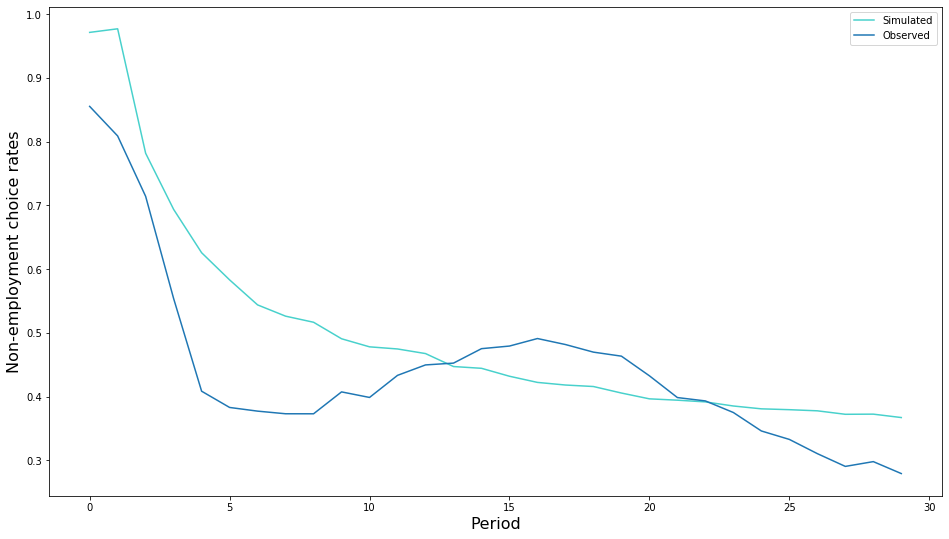

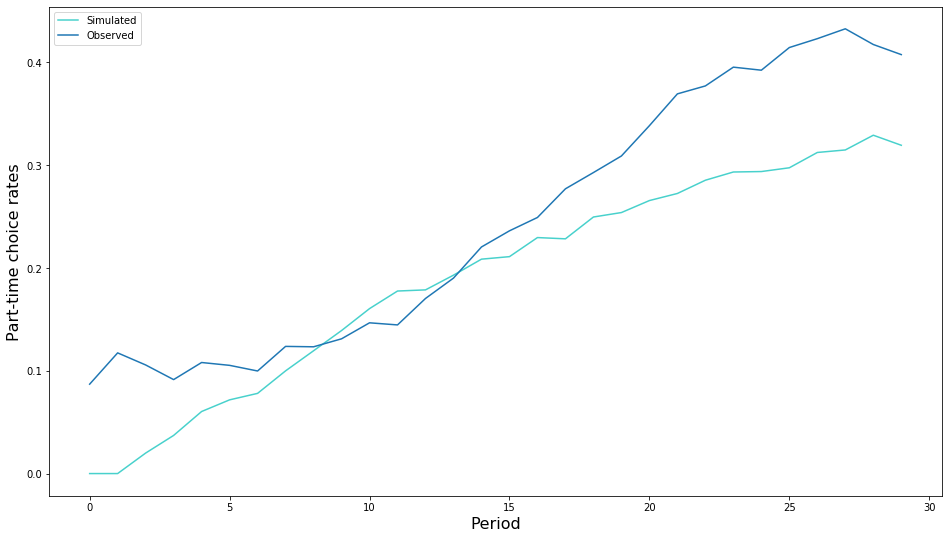

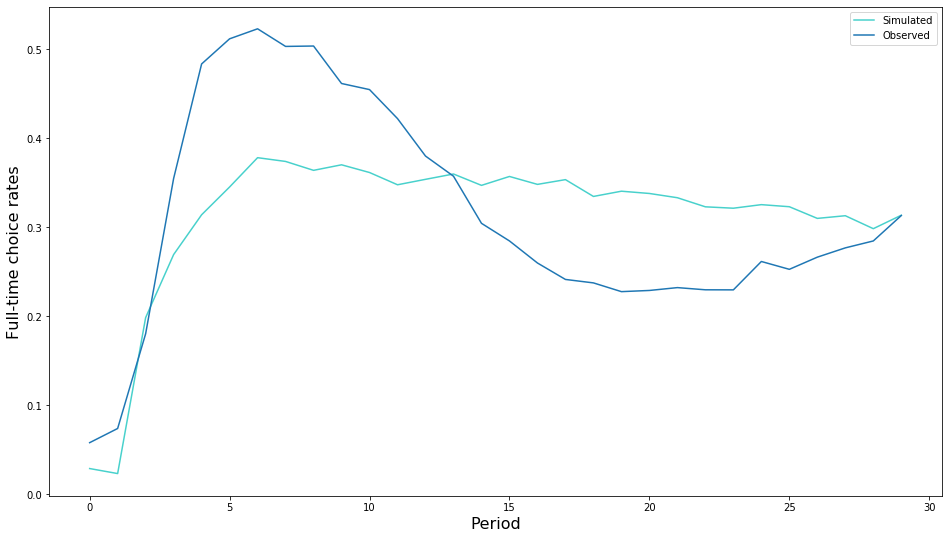

In [29]:
lables = ["Non-employment choice rates", "Part-time choice rates", "Full-time choice rates"]
for choice in range(3):

    obs_choice_prob = []
    for _, value in moments_obs["Choice_Probability"].items():
        temp = [_, value]
        obs_choice_prob.append(temp[1][choice])

    sim_choice_prob = []
    for _, value in moments_sim["Choice_Probability"].items():
        temp = [_, value]
        sim_choice_prob.append(temp[1][choice])
        
    x = np.arange(30)

    # Start plot
    ax = plt.figure(figsize=[16,9]).add_subplot(111)
    ax.set_ylabel(lables[choice], fontsize=16)
    ax.set_xlabel("Period", fontsize=16)

    plt.plot(x, sim_choice_prob, color = 'mediumturquoise')
    plt.plot(x, obs_choice_prob)

    ax.legend(["Simulated", "Observed"])

    #plt.savefig("choice_prob" + str(choice) + ".png", bbox_inches='tight')

Wages
--------

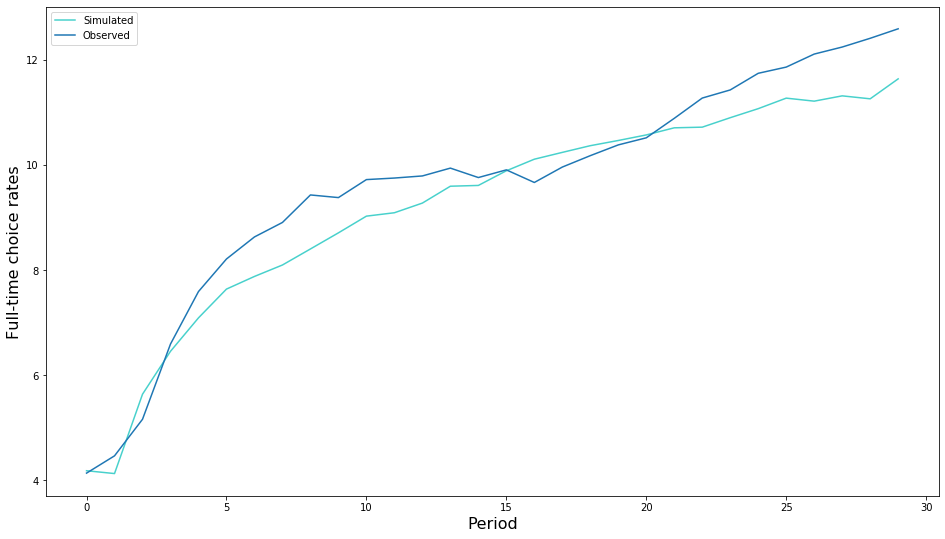

In [30]:
obs_wages = []
for _, value in moments_obs["Wage_Distribution"].items():
    temp = [_, value]
    obs_wages.append(temp[1][0])

sim_wages = []
for _, value in moments_sim["Wage_Distribution"].items():
    temp = [_, value]
    sim_wages.append(temp[1][0])

x = np.arange(30)

# Start plot
ax = plt.figure(figsize=[16,9]).add_subplot(111)
ax.set_ylabel(lables[choice], fontsize=16)
ax.set_xlabel("Period", fontsize=16)

plt.plot(x, sim_wages, color = 'mediumturquoise')
plt.plot(x, obs_wages)

ax.legend(["Simulated", "Observed"])

#plt.savefig('choice_prob_cf.png', bbox_inches='tight')

Analysis 30,000 obs
-----------------------

### Excercises named as follows:
- test_seed: start at true parameter vector, change simulation seed
- test_delta0: start at true parameter vector, set discount factor to 0
- test_delta0_start: start at parameter vector estimated in test_delta zero, set discount factor back to "true value", 0.98.

### Parameters
Difference in parameters estimated in the excercises to the true parameter vector

### Moments and Fit
Model fit for choice probabilities and wages over all periods

1. Comparison: Observed vs. seed test final values
2. Comparison: Observed vs. delta0 test final values
3. Comparison: Observed vs. delta0_start test final values


Parameters
--------------

In [ ]:
# Note: fval at evaluation 694: 0.39595

params_vec_final_seed_30000 = [
    1.92772,
    1.99657,
    1.97379,
    0.12185,
    0.15698,
    0.27153,
    0.18082,
    0.08941,
    0.12144,
    0.07802,
    0.05733,
    0.03378,
    1.8993,
    2.43923,
    -0.09789,
    -0.29873,
    -0.20045,
    -0.50031,
    0.2002,
    0.3006,
    0.01,
    0.19404,
    0.4677,
]

In [ ]:
# Note fval at evaluation 692 = 17.54504
# fval at evaluation 1 = 78.59526
params_vec_final_delta0_30000 = [
    1.94157,
    2.04247,
    1.97831,
    0.12244,
    0.15779,
    0.2743,
    0.17949,
    0.09362,
    0.12789,
    0.07822,
    0.05429,
    0.06985,
    1.87474,
    2.38738,
    -0.09989,
    -0.30352,
    -0.19746,
    -0.51674,
    0.20215,
    0.43676,
    0.01012,
    0.19474,
    0.46907,
]

In [ ]:
# Note: fval at evaluation 999 = 0.44455
# fval at evaluation 1 = 29.11011

params_vec_final_delta0_start_30000 = [
    1.91202,
    1.96785,
    1.9513,
    0.11977,
    0.15899,
    0.27521,
    0.18048,
    0.09215,
    0.13464,
    0.08018,
    0.05593,
    0.07257,
    1.88606,
    2.40087,
    -0.10039,
    -0.30033,
    -0.19943,
    -0.34787,
    0.20304,
    0.43849,
    0.00962,
    0.23124,
    0.47508,
]

In [ ]:
model_params_true = pd.read_pickle(INIT_FILES_DIR / "toy_model_init_file_03_3types.pkl")

In [ ]:
model_params_true["value"] - params_vec_final_seed_30000

In [ ]:
diff_true_delta0 = np.array(abs(model_params_true["value"] - params_vec_final_delta0_30000))
model_params_true["value"] - params_vec_final_delta0_30000
#diff_true_delta0

In [ ]:
diff_true_delta0_start = np.array(abs(model_params_true["value"] - params_vec_final_delta0_start_30000))
model_params_true["value"] - params_vec_final_delta0_start_30000

In [ ]:
diff_true_delta0 - diff_true_delta0_start

In [ ]:
model_params_seed = model_params_true
model_params_seed["value"] = params_vec_final_seed_30000

In [ ]:
model_params_delta0 = model_params_true
model_params_delta0["value"] = params_vec_final_delta0_30000

In [ ]:
model_params_delta0_start = model_params_true
model_params_delta0_start["value"] = params_vec_final_delta0_start_30000

In [ ]:
data_obs = pd.read_pickle(INIT_FILES_DIR / "data_obs_3types_9000.pkl")

In [ ]:
data_sim_seed = soepy.simulate(model_params_seed, str(INIT_FILES_DIR) + "/model_spec_init_test_seed_30000.yml", is_expected=False)

In [ ]:
data_sim_delta0 = soepy.simulate(model_params_delta0, str(INIT_FILES_DIR) + "/model_spec_init_test_delta0_30000.yml", is_expected=False)

In [ ]:
data_sim_delta0_start = soepy.simulate(model_params_delta0_start, str(INIT_FILES_DIR) + "/model_spec_init.yml", is_expected=False)

Get moments

In [ ]:
def get_moments(data):
    # Pre_process data frame

    # Determine the education level given years of experience
    data["Educ_Level"] = 0
    data.loc[data["Years_of_Education"] == 11, "Educ_Level"] = 1
    data.loc[data["Years_of_Education"] == 12, "Educ_Level"] = 2

    # Determine the observed wage given period choice
    data["Wage_Observed"] = 0
    data.loc[data["Choice"] == 0, "Wage_Observed"] = data.loc[
        data["Choice"] == 0, "Period_Wage_N"
    ]
    data.loc[data["Choice"] == 1, "Wage_Observed"] = data.loc[
        data["Choice"] == 1, "Period_Wage_P"
    ]
    data.loc[data["Choice"] == 2, "Wage_Observed"] = data.loc[
        data["Choice"] == 2, "Period_Wage_F"
    ]

    # Calculate moments

    # Initialize moments dictionary
    moments = dict()

    # Store moments in groups as nested dictionary
    for group in ["Wage_Distribution", "Choice_Probability"]:
        moments[group] = dict()

    # Compute unconditional moments of the wage distribution
    info = data.groupby(["Period"])["Wage_Observed"].describe().to_dict()

    # Save mean and standard deviation of wages for each period
    # to Wage Distribution section of the moments dictionary
    for period in range(30):  ## TO DO: Remove hard coded number
        moments["Wage_Distribution"][period] = []
        try:
            for label in ["mean", "std"]:
                moments["Wage_Distribution"][period].append(info[label][period])
        except KeyError:
            for i in range(2):
                moments["Wage_Distribution"][period].append(0.0)

    # Compute unconditional moments of the choice probabilities
    info = data.groupby(["Period"])["Choice"].value_counts(normalize=True).to_dict()

    for period in range(30):  ## TO DO: Remove hard coded number
        moments["Choice_Probability"][period] = []
        for choice in range(3):
            try:
                stat = info[(period, choice)]
            except KeyError:
                stat = 0.00
            moments["Choice_Probability"][period].append(stat)

    return moments

In [ ]:
obs_moments = get_moments(data_obs)
seed_sim_moments = get_moments(data_sim_seed)
delta0_sim_moments = get_moments(data_sim_delta0)
delta0_start_sim_moments = get_moments(data_sim_delta0_start)

Comparison: Observed vs. seed test final values
---------------------------------------------------------

Choice Probabilities

In [ ]:
lables = ["Non-employment choice rates", "Part-time choice rates", "Full-time choice rates"]
for choice in range(3):

    obs_choice_prob = []
    for _, value in obs_moments["Choice_Probability"].items():
        temp = [_, value]
        obs_choice_prob.append(temp[1][choice])

    sim_choice_prob = []
    for _, value in seed_sim_moments["Choice_Probability"].items():
        temp = [_, value]
        sim_choice_prob.append(temp[1][choice])
        
    x = np.arange(30)

    # Start plot
    ax = plt.figure(figsize=[16,9]).add_subplot(111)
    ax.set_ylabel(lables[choice], fontsize=16)
    ax.set_xlabel("Period", fontsize=16)

    plt.plot(x, sim_choice_prob, color = 'mediumturquoise')
    plt.plot(x, obs_choice_prob)

    ax.legend(["Simulated", "Observed"])

    #plt.savefig('choice_prob_cf.png', bbox_inches='tight')

Wages

In [ ]:
obs_wages = []
for _, value in obs_moments["Wage_Distribution"].items():
    temp = [_, value]
    obs_wages.append(temp[1][0])

sim_wages = []
for _, value in seed_sim_moments["Wage_Distribution"].items():
    temp = [_, value]
    sim_wages.append(temp[1][0])

x = np.arange(30)

# Start plot
ax = plt.figure(figsize=[16,9]).add_subplot(111)
ax.set_ylabel(lables[choice], fontsize=16)
ax.set_xlabel("Period", fontsize=16)

plt.plot(x, sim_wages, color = 'mediumturquoise')
plt.plot(x, obs_wages)

ax.legend(["Simulated", "Observed"])

#plt.savefig('choice_prob_cf.png', bbox_inches='tight')

Comparison: Observed vs. delta0 test final values
---------------------------------------------------------

In [ ]:
for choice in range(3):

    obs_choice_prob = []
    for _, value in obs_moments["Choice_Probability"].items():
        temp = [_, value]
        obs_choice_prob.append(temp[1][choice])

    sim_choice_prob = []
    for _, value in delta0_sim_moments["Choice_Probability"].items():
        temp = [_, value]
        sim_choice_prob.append(temp[1][choice])
        
    x = np.arange(30)

    # Start plot
    ax = plt.figure(figsize=[16,9]).add_subplot(111)
    ax.set_ylabel(lables[choice], fontsize=16)
    ax.set_xlabel("Period", fontsize=16)

    plt.plot(x, sim_choice_prob, color = 'mediumturquoise')
    plt.plot(x, obs_choice_prob)

    ax.legend(["Simulated", "Observed"])

In [ ]:
obs_wages = []
for _, value in obs_moments["Wage_Distribution"].items():
    temp = [_, value]
    obs_wages.append(temp[1][0])

sim_wages = []
for _, value in delta0_sim_moments["Wage_Distribution"].items():
    temp = [_, value]
    sim_wages.append(temp[1][0])

x = np.arange(30)

# Start plot
ax = plt.figure(figsize=[16,9]).add_subplot(111)
ax.set_ylabel(lables[choice], fontsize=16)
ax.set_xlabel("Period", fontsize=16)

plt.plot(x, sim_wages, color = 'mediumturquoise')
plt.plot(x, obs_wages)

ax.legend(["Simulated", "Observed"])

#plt.savefig('choice_prob_cf.png', bbox_inches='tight')

Comparison observed vs. delta0_start test final values
----------------------------------------------------------------

In [ ]:
for choice in range(3):

    obs_choice_prob = []
    for _, value in obs_moments["Choice_Probability"].items():
        temp = [_, value]
        obs_choice_prob.append(temp[1][choice])

    sim_choice_prob = []
    for _, value in delta0_start_sim_moments["Choice_Probability"].items():
        temp = [_, value]
        sim_choice_prob.append(temp[1][choice])
        
    x = np.arange(30)

    # Start plot
    ax = plt.figure(figsize=[16,9]).add_subplot(111)
    ax.set_ylabel(lables[choice], fontsize=16)
    ax.set_xlabel("Period", fontsize=16)

    plt.plot(x, sim_choice_prob, color = 'mediumturquoise')
    plt.plot(x, obs_choice_prob)

    ax.legend(["Simulated", "Observed"])

In [ ]:
obs_wages = []
for _, value in obs_moments["Wage_Distribution"].items():
    temp = [_, value]
    obs_wages.append(temp[1][0])

sim_wages = []
for _, value in delta0_start_sim_moments["Wage_Distribution"].items():
    temp = [_, value]
    sim_wages.append(temp[1][0])

x = np.arange(30)

# Start plot
ax = plt.figure(figsize=[16,9]).add_subplot(111)
ax.set_ylabel(lables[choice], fontsize=16)
ax.set_xlabel("Period", fontsize=16)

plt.plot(x, sim_wages, color = 'mediumturquoise')
plt.plot(x, obs_wages)

ax.legend(["Simulated", "Observed"])

#plt.savefig('choice_prob_cf.png', bbox_inches='tight')